cov:
[[ 55.5  14.5]
 [ 14.5  24.3]]
miu: (7.0, 7.5999999999999996)
eig_vals [ 61.19812198  18.60187802]
eig_vects:
[[ 0.9307145  -0.36574653]
 [ 0.36574653  0.9307145 ]]
4.0


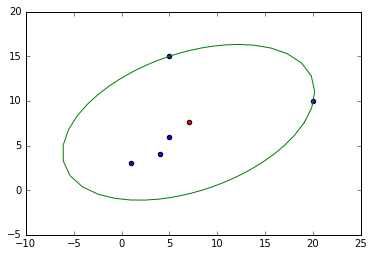

In [2]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

KWANTYL = 0.9

data = [(1, 3), (4,4), (5, 6), (5, 15), (20, 10)]
data = np.array(data)
plt.scatter(data[:,0], data[:,1])

cov = np.cov(np.transpose(data))  # dobrze?
miu = (np.mean(data[:,0]), np.mean(data[:,1]) )
print 'cov:\n', cov
print 'miu:', miu
plt.scatter(miu[0], miu[1], c='red')

eig_vals, eig_vects =  np.linalg.eig(cov) # kazdy wektor w kolejnej kolumnie
print 'eig_vals', eig_vals
print 'eig_vects:\n', eig_vects

# alpha = -2 * np.log(0.9)
# print 'alpha', alpha

# chisquare_val = 2.4477 # is for 0.95
theta_grid = np.linspace(0,2*np.pi)
# ellipse_x_r  = chisquare_val*np.sqrt(eig_vals[0])*np.cos( theta_grid )
# ellipse_y_r  = chisquare_val*np.sqrt(eig_vals[1])*np.sin( theta_grid )

# inserted wzorek od leśniaka
con_inv = np.linalg.inv(cov)
a, b = con_inv[0,:]
c, d = con_inv[1,:]

# leśniak 2 | przerzucamy dane do przestrzeni, gdzie elipsa jest kolem i liczymy kwantyl
les2 = [np.dot(np.dot((row-miu).T, con_inv), (row-miu)) for row in data]
les2 = sorted(les2)
ind = np.floor(KWANTYL*len(les2))
print ind

# INSERTED WZOREK OD LESNIAKA DALSZA CZESC
licznik = les2[int(ind)]
mianownik = a*np.cos(theta_grid)*np.cos(theta_grid) + (b+c)*np.sin(theta_grid)*np.cos(theta_grid) + d*np.sin(theta_grid)*np.sin(theta_grid)
lam = np.sqrt(licznik/mianownik)

# wspolrzedne elipsy
x = np.multiply(lam, np.cos(theta_grid))
y = np.multiply(lam, np.sin(theta_grid))

# angle = np.arctan2(eig_vects[1,0], eig_vects[0,0])
# if(angle < 0):
#     angle = angle + 2*np.pi

# R = np.array([[ np.cos(angle), np.sin(angle)], [-np.sin(angle), np. cos(angle)] ])
# r_ellipse = np.dot(np.vstack((ellipse_x_r, ellipse_y_r)).T, R)

plt.plot(x+miu[0], y+miu[1], c='green')
# plt.plot(r_ellipse[:,0]+miu[0], r_ellipse[:,1]+miu[1], c='green')
plt.show()

In [2]:
print les2


[0.12867182009838368, 0.54882290934645106, 1.0969606465214334, 3.0934469430780043, 3.1320976809557273]
